In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import logging

import matplotlib.pyplot as plt
import numpy as np

from yass.preprocessing import Preprocessor
from yass.mainprocess import Mainprocessor
from yass.deconvolution import Deconvolution
import yass

logging.basicConfig(level=logging.DEBUG)

In [3]:
# neural network detector
cfg = yass.Config.from_yaml('../config/nnet100k.yaml')
pp = Preprocessor(cfg)
score, clr_idx, spt = pp.process()

INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt
INFO:yass.preprocessing:Preprocessing the data in progress...


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/detectnet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/detectnet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/ae_31.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt


INFO:tensorflow:Restoring parameters from /users/Edu/data/yass/triagenet1.ckpt
N/A% (0 of 1) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--INFO:yass.preprocessing:Preprocessing done in 2 seconds.
INFO:yass.preprocessing:	reading data:	0.004126 seconds
INFO:yass.preprocessing:	filtering:	0.011685 seconds
INFO:yass.preprocessing:	standardization:	0.023607 seconds
INFO:yass.preprocessing:	detection:	1.176871 seconds
INFO:yass.preprocessing:	whitening:	0.021591 seconds
INFO:yass.preprocessing:	saving recording:	0.002414 seconds
INFO:yass.preprocessing:	getting waveforms:	0.804346 seconds
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


In [4]:
[s.shape for s in score]

[(24, 3, 7),
 (72, 3, 4),
 (14, 3, 4),
 (18, 3, 4),
 (140, 3, 4),
 (111, 3, 4),
 (165, 3, 4)]

In [5]:
[c.shape for c in clr_idx]

[(24,), (72,), (14,), (18,), (140,), (111,), (165,)]

In [20]:
clr_idx[0]

array([ 15,  24,  29,  31,  39,  64, 104, 105, 110, 111, 119, 123, 144,
       158, 163, 175, 177, 182, 222, 252, 265, 290, 305, 307])

In [6]:
[s.shape for s in spt]

[(309, 2), (1446, 2), (894, 2), (945, 2), (1259, 2), (975, 2), (950, 2)]

In [21]:
spt[0][15]

array([4807,    0], dtype=int32)

In [7]:
mp = Mainprocessor(cfg, score, clr_idx, spt)
spike_train, spt_left = mp.mainProcess()

INFO:yass.mainprocess:Triaging...
INFO:yass.mainprocess:Coresettting...
INFO:yass.mainprocess:Masking...
INFO:yass.mainprocess:Clustering...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.mainprocess:Getting Templates...
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00
INFO:yass.mainprocess:Mainprocess done in 0 seconds.
INFO:yass.mainprocess:	triage:	0.005631 seconds
INFO:yass.mainprocess:	coreset:	0.068024 seconds
INFO:yass.mainprocess:	masking:	0.005394 seconds
INFO:yass.mainprocess:	clustering:	0.409537 seconds
INFO:yass.mainprocess:	make templates:	0.021478 seconds


In [8]:
spike_train.shape

(428, 2)

In [9]:
[l.shape for l in spt_left]

[(298, 2), (1387, 2), (887, 2), (933, 2), (1147, 2), (886, 2), (812, 2)]

In [10]:
mp.templates.shape

(7, 31, 5)

In [11]:
dc = Deconvolution(cfg, np.transpose(mp.templates,[1,0,2]), spt_left)
spikeTrain_col = dc.fullMPMU()

DEBUG:yass.deconvolution:wfile is /users/Edu/data/yass/tmp/wrec.bin 1401680
100% (1 of 1) |###########################| Elapsed Time: 0:00:00 Time: 0:00:00


Deconvoltuion done in 0 seconds.


In [12]:
spikeTrain_col.shape

(678, 2)

In [13]:
spikeTrain_col.shape

(678, 2)

In [14]:
spikeTrain_col

array([[ 1274,     4],
       [ 1643,     4],
       [ 2047,     4],
       ..., 
       [55284,     4],
       [71684,     4],
       [77161,     4]])

In [26]:
mp.templates.shape

(7, 31, 5)

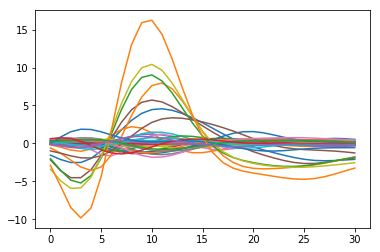

In [27]:
for t in mp.templates:
    plt.plot(t)

plt.show()

In [16]:
whiten = np.fromfile(os.path.join(cfg.root, 'tmp/wrec.bin'),
                   dtype='int16')
whiten = whiten.reshape((100120, 7))

In [17]:
whiten.shape

(100120, 7)

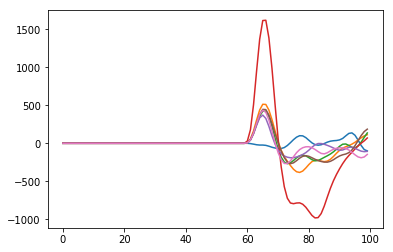

In [25]:
for t in whiten.T:
    plt.plot(t[:100])

plt.show()